In [16]:
from Bio import AlignIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# This script reads a multiple sequence alignment in FASTA format and calculates the Shannon entropy for each column.
# It identifies highly conserved regions based on a threshold for entropy.

# Reading the alignment file
alignment = AlignIO.read("aligned_sequences.fasta", "fasta")
alignment

<<class 'Bio.Align.MultipleSeqAlignment'> instance (185 records of length 30996) at 7f372011a7c0>

In [3]:
# Define a function to calculate Shannon entropy for each column
# Shannon entropy is a measure of uncertainty or information content
# It is defined as H(X) = -Σ p(x) log2(p(x)), where p(x) is the probability of each symbol in the column
def shannon_entropy(column):
    freqs = np.unique(column, return_counts=True)[1] / len(column)
    return -np.sum(freqs * np.log2(freqs))

<Axes: >

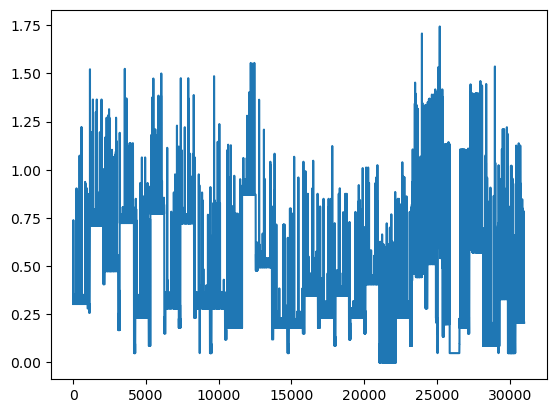

In [18]:
# Calculate Shannon entropy for each column in the alignment
entropy_scores = [shannon_entropy(column) for column in zip(*alignment)]
sns.lineplot(data=entropy_scores)

In [14]:
# Create a sliding window to calculate mean entropy across the alignment
window_size = 50
def sliding_window_mean(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Calculate mean entropy using a sliding window
mean_entropy_scores = sliding_window_mean(entropy_scores, window_size)
mean_entropy_scores

array([0.31303619, 0.31303619, 0.31303619, ..., 0.22143685, 0.22143685,
       0.22143685])

<Axes: >

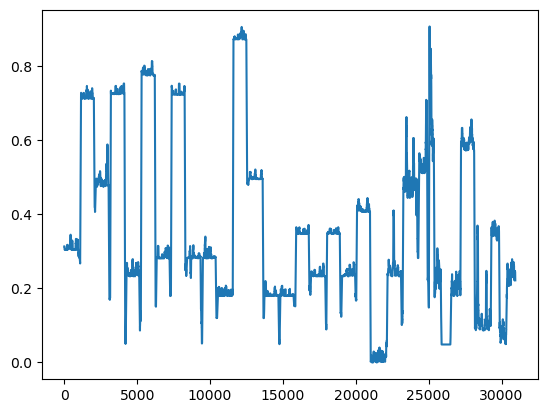

In [ ]:
sns.lineplot(data=mean_entropy_scores)